In [1]:
from ffnn_scratch import FFNN
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalisasi
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_train=y_train.astype('float64')
y_test=y_test.astype('float64')

Epoch 0: Train Loss = 1.71298, Val Loss = 1.73198
Epoch 1: Train Loss = 0.68836, Val Loss = 0.69207
Epoch 2: Train Loss = 1.08084, Val Loss = 1.17016
Epoch 3: Train Loss = 1.04185, Val Loss = 1.12568


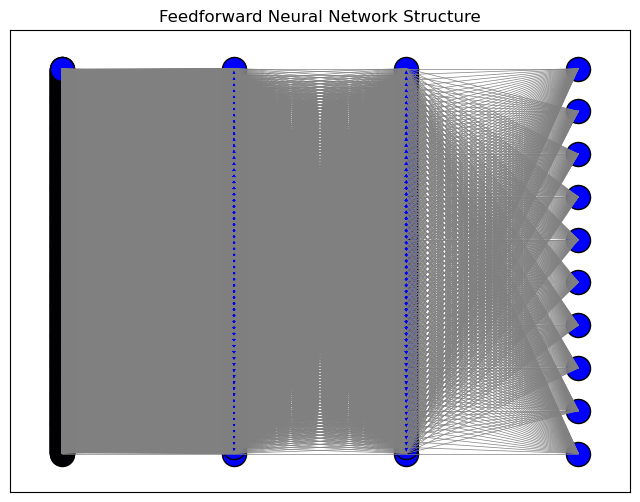

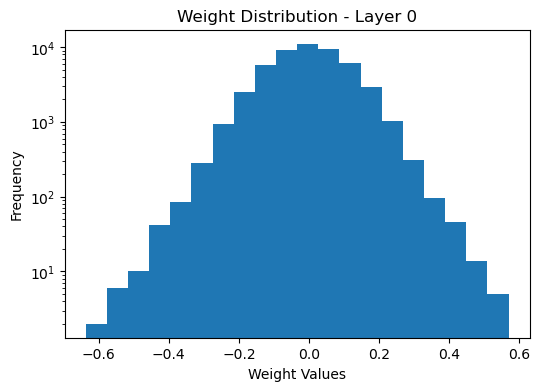

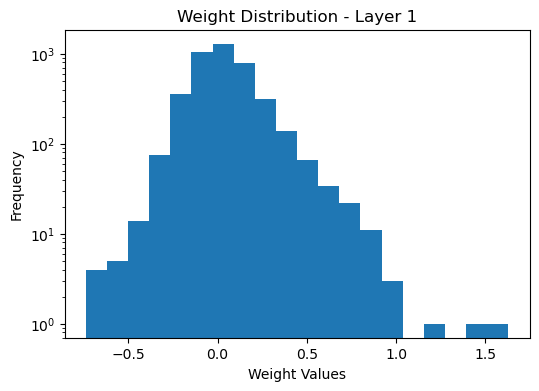

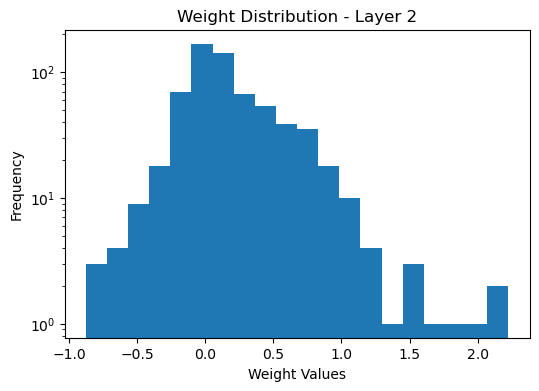

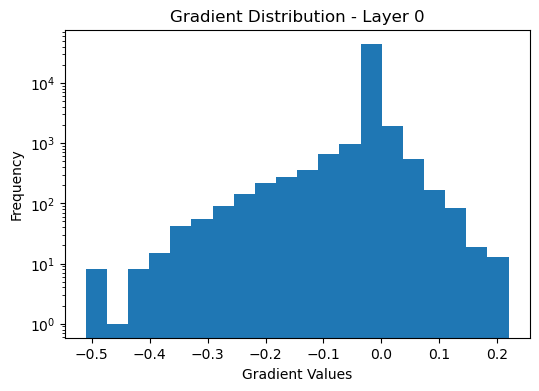

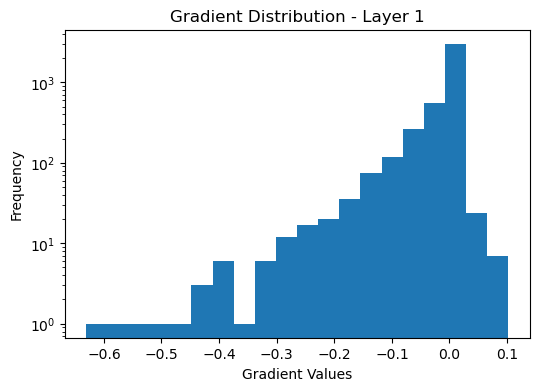

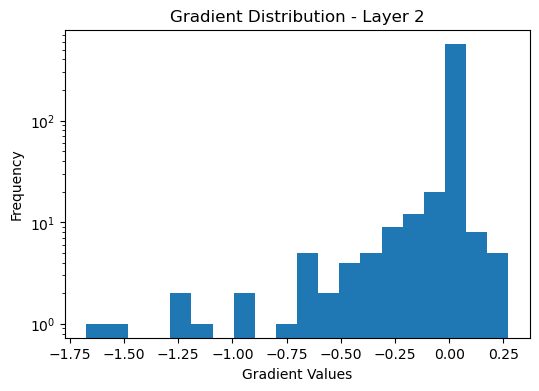

[[2.48605459e-172 5.62934791e-179 8.32141204e-170 ... 9.99387082e-001
  1.51484781e-175 6.10035070e-004]
 [5.49543820e-002 2.12633224e-010 7.48958394e-001 ... 1.01963882e-101
  3.42732465e-002 1.34674339e-100]
 [1.12517888e-006 9.94154401e-001 1.30806738e-003 ... 1.12416262e-027
  7.26659777e-004 1.80769455e-027]
 ...
 [7.39325434e-247 6.01320918e-258 3.88291438e-244 ... 1.23890216e-007
  1.57573570e-249 1.84069351e-003]
 [4.57237608e-003 3.62165955e-003 5.38155508e-003 ... 6.10072142e-040
  4.44523060e-001 6.89085925e-040]
 [2.24641710e-003 4.34594476e-014 6.57682609e-004 ... 2.65078389e-080
  1.00757255e-004 8.47878171e-080]]


In [18]:
layer_sizes = [784, 64,64, 10]
activations = ['relu', 'relu', 'softmax']
init_params = {'lower': -1.0, 'upper': 1.0}

model = FFNN(layer_sizes, activations, weight_init='random_normal', init_params=init_params, seed=42)
history = model.train(X_train, y_train, batch_size=2, epochs=3, learning_rate=0.001, loss_func="categorical_cross_entropy",
                          X_val=X_test, y_val=y_test, verbose=1)

model.plot_network()
model.plot_weight_distribution([0, 1,2], log_scale=True)
model.plot_gradient_distribution([0, 1,2], log_scale=True)
print(model.infer(X_test))